### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import namedtuple
from scipy.signal import butter, filtfilt

### Read and preprocess data

In [2]:
EEG_112_CH2 = pd.read_csv('EEG_112_CH2.csv')
bis_112 = pd.read_csv('bis_112.csv')

In [3]:
B112=bis_112['BIS/BIS']
E112=EEG_112_CH2['BIS/EEG2_WAV']
print ('The shape of EEG signals and BIS for patient 112 is {} and {} '.format(E112.shape,B112.shape) )

The shape of EEG signals and BIS for patient 112 is (1374698,) and (10737,) 


In [4]:
#checking for missing values

def missing_values(eeg_signal):

    # Check for missing values
    missing_values = np.isnan(eeg_signal)
    length_signals = len(eeg_signal)

    # Count the number of missing values
    num_missing_values = np.sum(missing_values)
    percentage_missing_values = (num_missing_values/length_signals)*100

    # Print the indices and values of missing values
    missing_indices = np.where(missing_values)[0]
    missing_values_list = eeg_signal[missing_indices]

    print("Missing Values:")
    print(f"Total Missing Values: {num_missing_values}")
    print(f"Percentage of Missing Values: {percentage_missing_values} %")  
missing_values(E112)

Missing Values:
Total Missing Values: 314
Percentage of Missing Values: 0.022841380434102616 %


In [5]:
E112_copy = np.copy(E112)

In [6]:
# Handling missing values

def handle_missing_values(signal):
    # Interpolate missing values using linear interpolation
    mask = np.isnan(signal)
    signal[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), signal[~mask])
    return signal
handle_missing_values(E112_copy)

array([11.65, 11.65, 11.65, ..., 15.5 , 15.5 , 15.5 ])

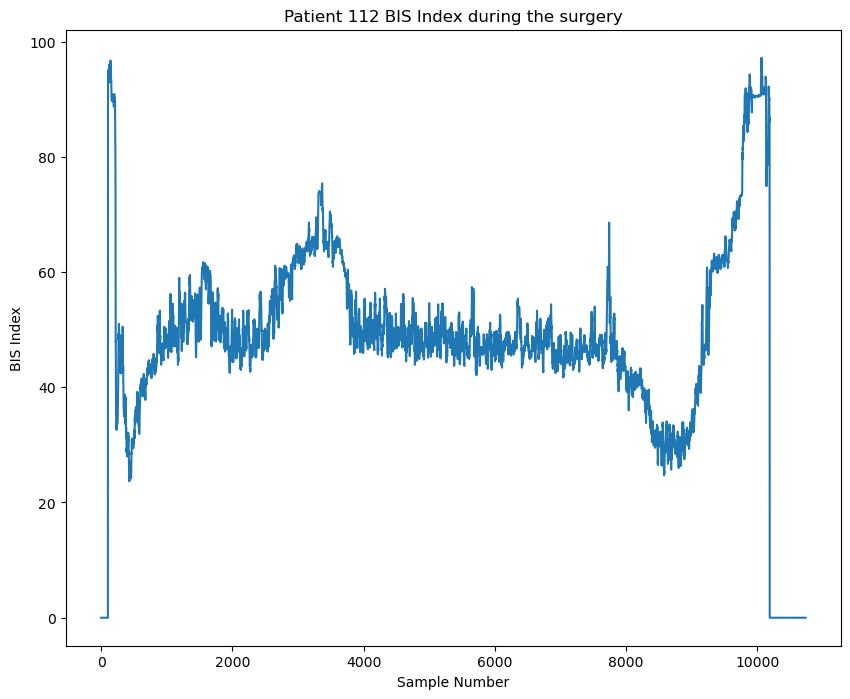

In [7]:
# Patient 112 BIS values throughout the surgery
fig = plt.figure(figsize=(10, 8))
plt.plot(B112)
plt.xlabel("Sample Number")
plt.ylabel("BIS Index")
plt.title("Patient 112 BIS Index during the surgery")
plt.show()

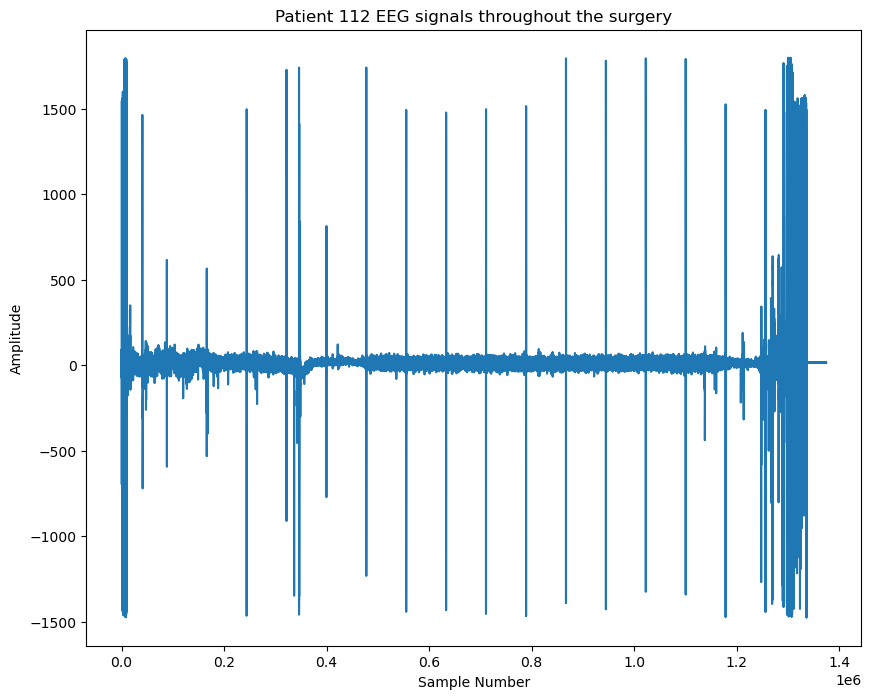

In [8]:
# Patient 112 EEG signals throughout the surgery
fig = plt.figure(figsize=(10, 8))
plt.plot(E112)
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Patient 112 EEG signals throughout the surgery")
plt.show()

### Windowing raw EEG signals

In [9]:
# Generate the windows
def windowing(bis, eeg, window_size, sampling_rate, overlap, verbose=False):
    """
    Function to window the raw EEG signals
    
    """
    
    bis_len = len(bis)   


    start, end = 0, window_size
    
    eeg_start, eeg_end = 0, end * sampling_rate
    step = window_size - overlap
    
    while True:
        if end > bis_len:
            break
        
        bis_idx = bis[start:end]
        
        eeg_sample = eeg[eeg_start:eeg_end]
        
        data = namedtuple('EEG', ['eeg', 'bis'])
        
        tup = data(eeg_sample, bis_idx)
        
        if verbose:
            print("EEG Start: {} - {}".format(eeg_start, eeg_end))
        
        yield tup
        
        # update ranges
        start += step
        end += step
        
        eeg_start = start * sampling_rate
        eeg_end = end * sampling_rate
        

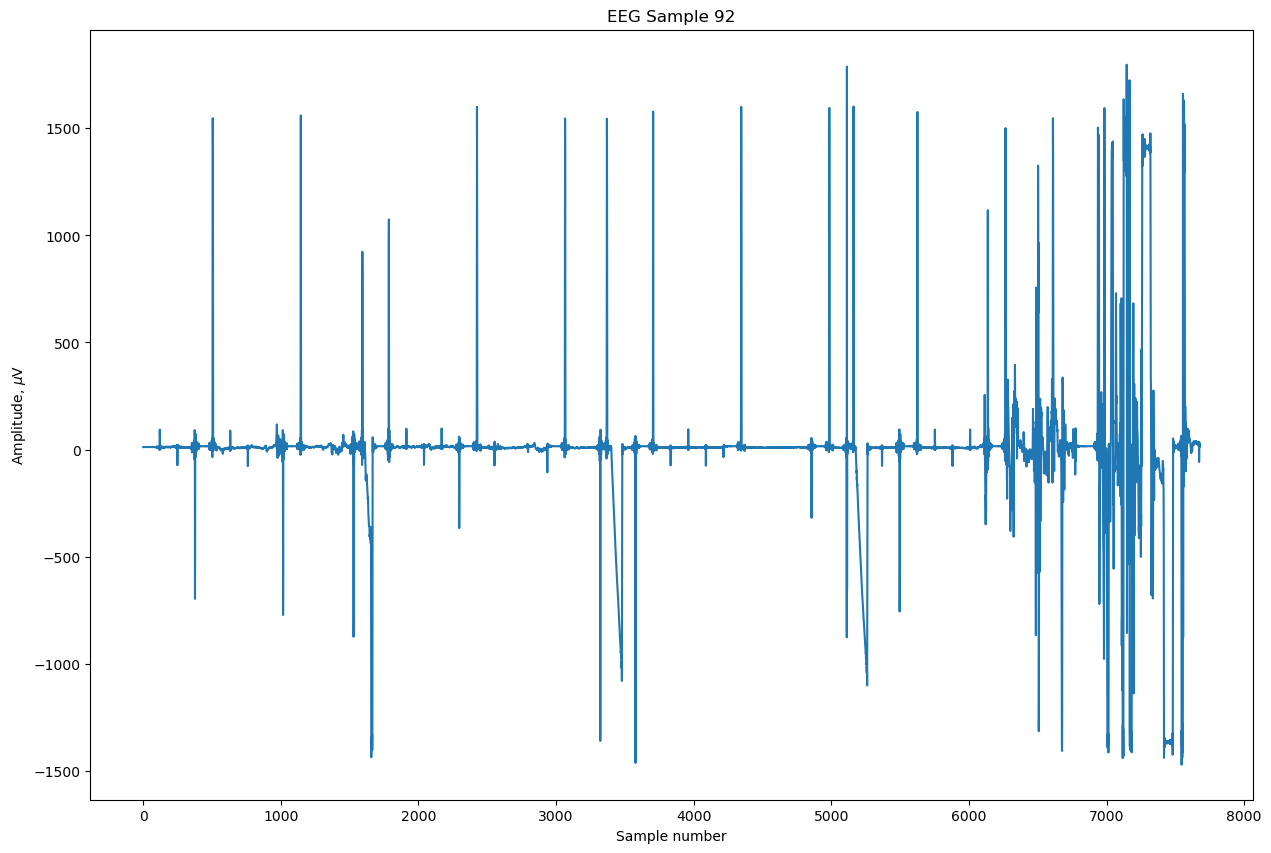

In [25]:
bis = B112
eeg = E112_copy
wind = windowing(bis, eeg, window_size=60, sampling_rate=128, overlap=59, verbose=False)
sample = next(wind)

w_112=sample.eeg
bw_112=sample.bis

figure = plt.figure(figsize=(15, 10))
plt.title("EEG Sample 92")
plt.ylabel("Amplitude, $\mu$V")
plt.xlabel("Sample number")
plt.plot(w_112)
plt.show() 

### Bandpass filtering without windowing

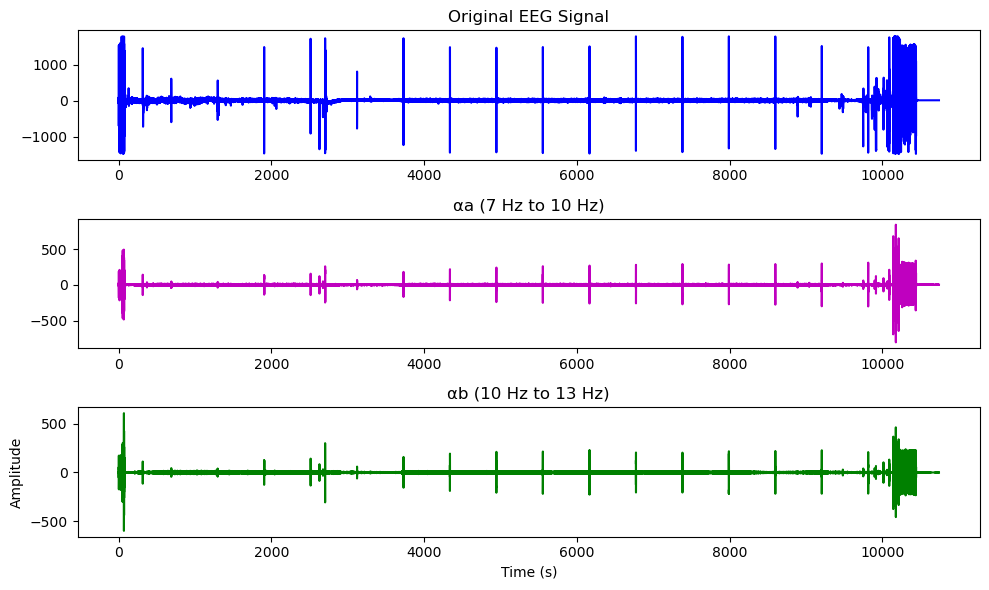

In [11]:
# Define the EEG signal
eeg_signal = E112_copy # Replace with your actual EEG signal

# Define the frequency bands
alpha_a = (7,10)
alpha_b = (10,13)

# Define the filter function
def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Apply bandpass filters to the EEG signal
fs = 128  # Replace with the actual sampling rate of your EEG signal
alpha_a_filtered = bandpass_filter(eeg_signal, alpha_a[0], alpha_a[1], fs)
alpha_b_filtered = bandpass_filter(eeg_signal, alpha_b[0], alpha_b[1], fs)


# Plot the original and filtered signals
time = np.arange(len(eeg_signal)) / fs



# Create a figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 6))


# Original EEG signal
axs[0].plot(time, eeg_signal, 'b')
axs[0].set_title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Alpha a band filtered signal
axs[1].plot(time, alpha_a_filtered, 'm')
axs[1].set_title('αa (7 Hz to 10 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Alpha b band filtered signal
axs[2].plot(time, alpha_b_filtered, 'g')
axs[2].set_title('αb (10 Hz to 13 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')



plt.tight_layout()
plt.show()

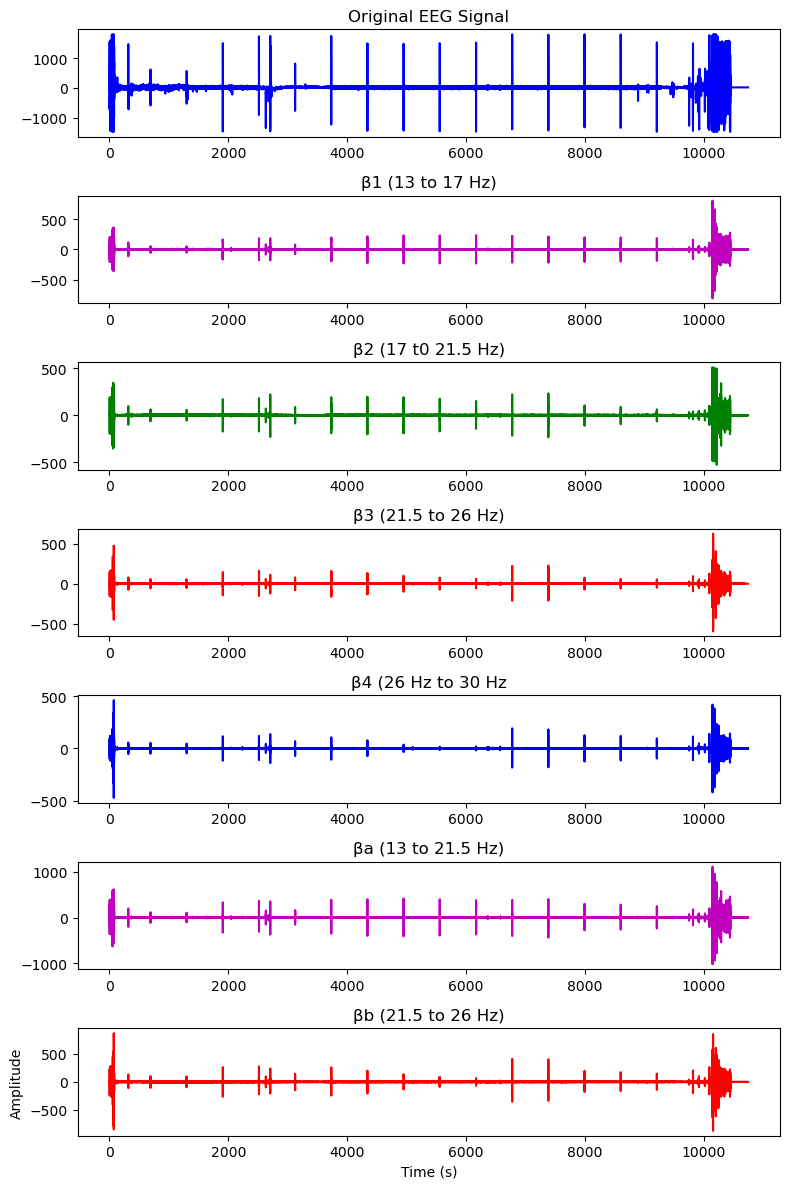

In [12]:
# Define the EEG signal
eeg_signal = E112_copy # Replace with your actual EEG signal

# Define the frequency bands
beta_1 = (13,17)
beta_2 = (17,21.5)
beta_3 = (21.5,26)
beta_4 = (26,30)
beta_a = (13,21.5)
beta_b = (21.5,30)

# Apply bandpass filters to the EEG signal
fs = 128  # Replace with the actual sampling rate of your EEG signal
beta_1_filtered = bandpass_filter(eeg_signal, beta_1[0], beta_1[1], fs)
beta_2_filtered = bandpass_filter(eeg_signal, beta_2[0], beta_2[1], fs)
beta_3_filtered = bandpass_filter(eeg_signal, beta_3[0], beta_3[1], fs)
beta_4_filtered = bandpass_filter(eeg_signal, beta_4[0], beta_4[1], fs)
beta_a_filtered = bandpass_filter(eeg_signal, beta_a[0], beta_a[1], fs)
beta_b_filtered = bandpass_filter(eeg_signal, beta_b[0], beta_b[1], fs)

# Plot the original and filtered signals
time = np.arange(len(eeg_signal)) / fs

# Create a figure and subplots
fig, axs = plt.subplots(7, 1, figsize=(8, 12))


#plt.figure(figsize=(12, 8))

# Original EEG signal
axs[0].plot(time, eeg_signal, 'b')
axs[0].set_title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta 1 band filtered signal
axs[1].plot(time, beta_1_filtered, 'm')
axs[1].set_title('β1 (13 to 17 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta 2 band filtered signal
axs[2].plot(time, beta_2_filtered, 'g')
axs[2].set_title('β2 (17 t0 21.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta 3 band filtered signal
axs[3].plot(time, beta_3_filtered, 'r')
axs[3].set_title('β3 (21.5 to 26 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta 4 band filtered signal
axs[4].plot(time, beta_4_filtered, 'b')
axs[4].set_title('β4 (26 Hz to 30 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta a band filtered signal
axs[5].plot(time, beta_a_filtered, 'm')
axs[5].set_title('βa (13 to 21.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beat b band filtered signal
axs[6].plot(time, beta_b_filtered, 'r')
axs[6].set_title('βb (21.5 to 26 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()


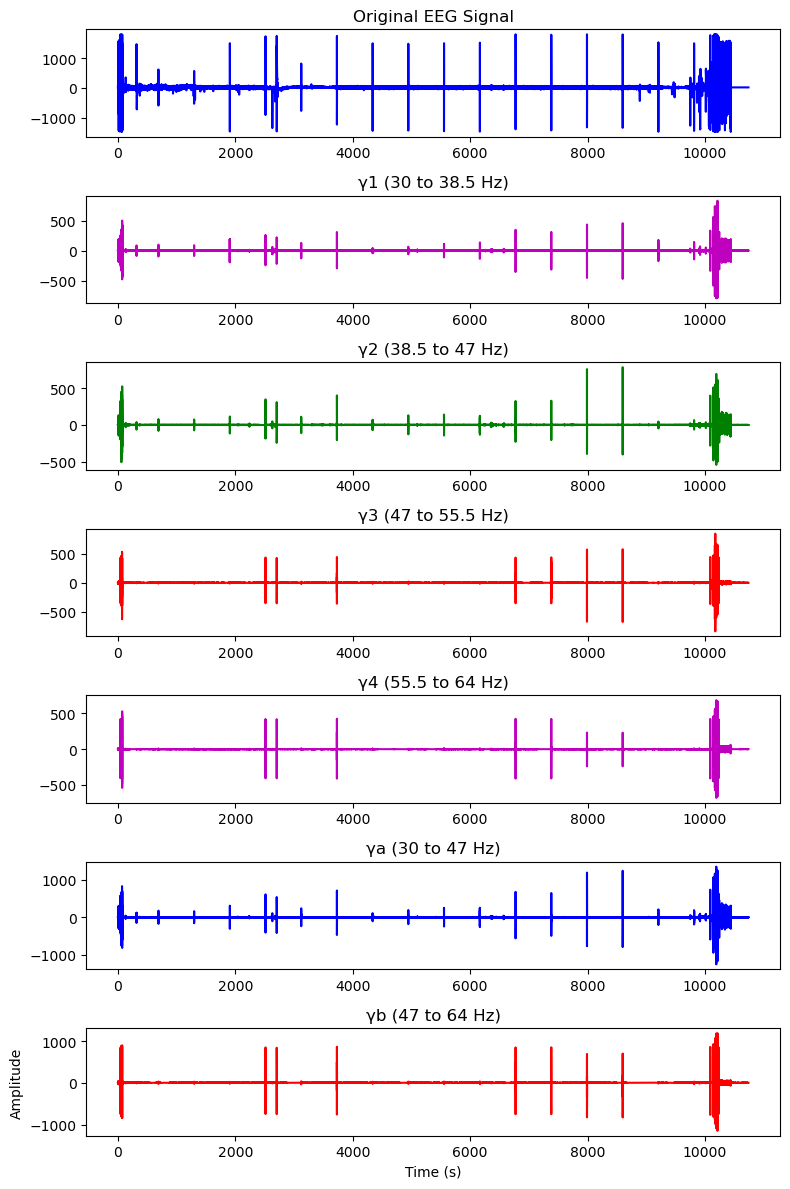

In [13]:
# Define the EEG signal
eeg_signal = E112_copy  # Replace with your actual EEG signal

# Define the frequency bands
gamma_1 = (30,38.5)
gamma_2 = (38.6,47)
gamma_3 = (47,55.5)
gamma_4 = (55.5,63.5)
gamma_a = (30,47)
gamma_b = (47,63.5)


# Apply bandpass filters to the EEG signal
fs = 128  # Replace with the actual sampling rate of your EEG signal
gamma_1_filtered = bandpass_filter(eeg_signal, gamma_1[0], gamma_1[1], fs)
gamma_2_filtered = bandpass_filter(eeg_signal, gamma_2[0], gamma_2[1], fs)
gamma_3_filtered = bandpass_filter(eeg_signal, gamma_3[0], gamma_3[1], fs)
gamma_4_filtered = bandpass_filter(eeg_signal, gamma_4[0], gamma_4[1], fs)
gamma_a_filtered = bandpass_filter(eeg_signal, gamma_a[0], gamma_a[1], fs)
gamma_b_filtered = bandpass_filter(eeg_signal, gamma_b[0], gamma_b[1], fs)

# Plot the original and filtered signals
time = np.arange(len(eeg_signal)) / fs

# Create a figure and subplots
fig, axs = plt.subplots(7, 1, figsize=(8, 12))


#plt.figure(figsize=(12, 8))

# Original EEG signal
axs[0].plot(time, eeg_signal, 'b')
axs[0].set_title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma 1 band filtered signal
axs[1].plot(time, gamma_1_filtered, 'm')
axs[1].set_title('γ1 (30 to 38.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma 2 band filtered signal
axs[2].plot(time, gamma_2_filtered, 'g')
axs[2].set_title('γ2 (38.5 to 47 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma 3 band filtered signal
axs[3].plot(time, gamma_3_filtered, 'r')
axs[3].set_title('γ3 (47 to 55.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma 4 band filtered signal
axs[4].plot(time, gamma_4_filtered, 'm')
axs[4].set_title('γ4 (55.5 to 64 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma a band filtered signal
axs[5].plot(time, gamma_a_filtered, 'b')
axs[5].set_title('γa (30 to 47 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma b band filtered signal
axs[6].plot(time, gamma_b_filtered, 'r')
axs[6].set_title('γb (47 to 64 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()


### Bandpass Filtering with 60 seconds windowing

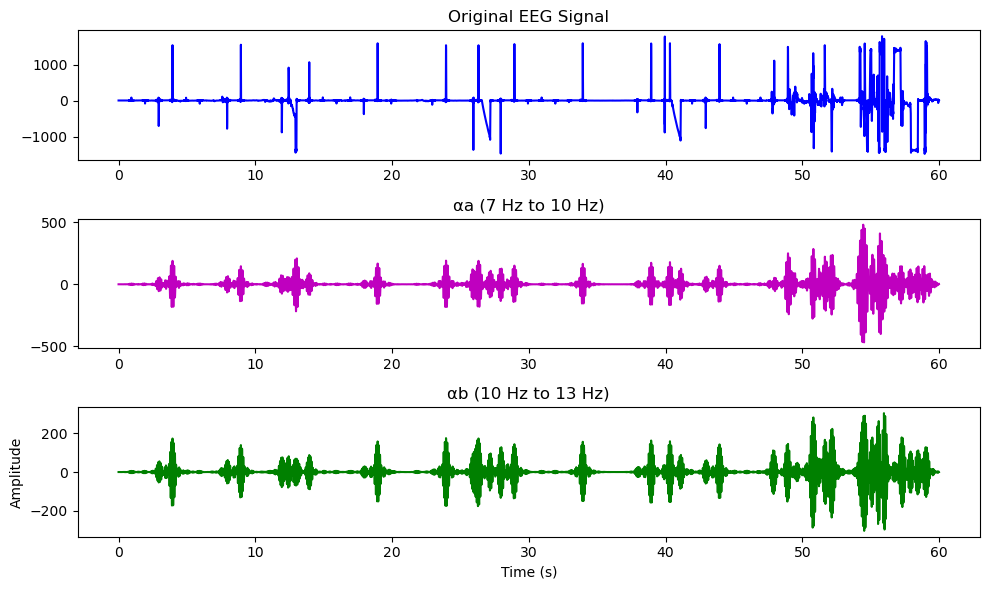

In [14]:
# Define the EEG signal
eeg_signal = w_112 # Replace with your actual EEG signal

# Define the frequency bands
alpha_a = (7,10)
alpha_b = (10,13)

# Define the filter function
def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Apply bandpass filters to the EEG signal
fs = 128  # Replace with the actual sampling rate of your EEG signal
alpha_a_filtered = bandpass_filter(eeg_signal, alpha_a[0], alpha_a[1], fs)
alpha_b_filtered = bandpass_filter(eeg_signal, alpha_b[0], alpha_b[1], fs)


# Plot the original and filtered signals
time = np.arange(len(eeg_signal)) / fs



# Create a figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 6))


# Original EEG signal
axs[0].plot(time, eeg_signal, 'b')
axs[0].set_title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Alpha a band filtered signal
axs[1].plot(time, alpha_a_filtered, 'm')
axs[1].set_title('αa (7 Hz to 10 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Alpha b band filtered signal
axs[2].plot(time, alpha_b_filtered, 'g')
axs[2].set_title('αb (10 Hz to 13 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')



plt.tight_layout()
plt.show()

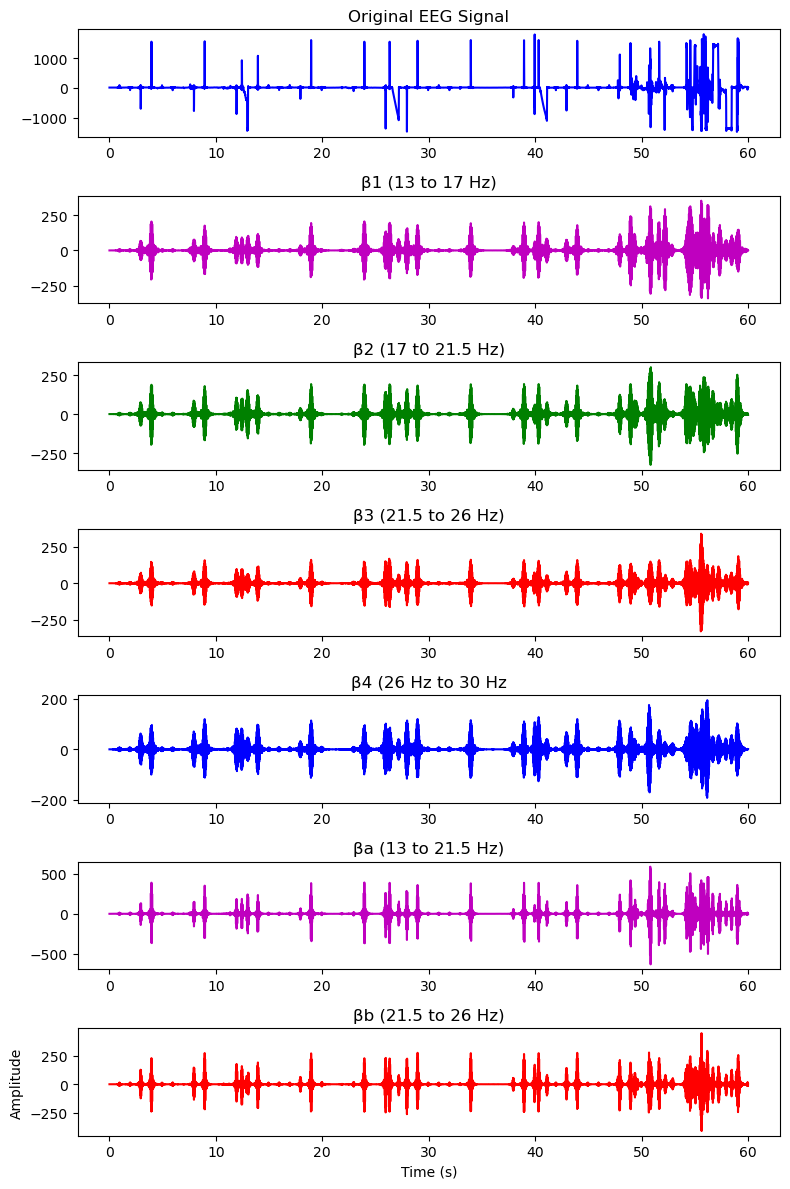

In [15]:
# Define the EEG signal
eeg_signal = w_112 # Replace with your actual EEG signal

# Define the frequency bands
beta_1 = (13,17)
beta_2 = (17,21.5)
beta_3 = (21.5,26)
beta_4 = (26,30)
beta_a = (13,21.5)
beta_b = (21.5,30)

# Apply bandpass filters to the EEG signal
fs = 128  # Replace with the actual sampling rate of your EEG signal
beta_1_filtered = bandpass_filter(eeg_signal, beta_1[0], beta_1[1], fs)
beta_2_filtered = bandpass_filter(eeg_signal, beta_2[0], beta_2[1], fs)
beta_3_filtered = bandpass_filter(eeg_signal, beta_3[0], beta_3[1], fs)
beta_4_filtered = bandpass_filter(eeg_signal, beta_4[0], beta_4[1], fs)
beta_a_filtered = bandpass_filter(eeg_signal, beta_a[0], beta_a[1], fs)
beta_b_filtered = bandpass_filter(eeg_signal, beta_b[0], beta_b[1], fs)

# Plot the original and filtered signals
time = np.arange(len(eeg_signal)) / fs

# Create a figure and subplots
fig, axs = plt.subplots(7, 1, figsize=(8, 12))


#plt.figure(figsize=(12, 8))

# Original EEG signal
axs[0].plot(time, eeg_signal, 'b')
axs[0].set_title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta 1 band filtered signal
axs[1].plot(time, beta_1_filtered, 'm')
axs[1].set_title('β1 (13 to 17 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta 2 band filtered signal
axs[2].plot(time, beta_2_filtered, 'g')
axs[2].set_title('β2 (17 t0 21.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta 3 band filtered signal
axs[3].plot(time, beta_3_filtered, 'r')
axs[3].set_title('β3 (21.5 to 26 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta 4 band filtered signal
axs[4].plot(time, beta_4_filtered, 'b')
axs[4].set_title('β4 (26 Hz to 30 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beta a band filtered signal
axs[5].plot(time, beta_a_filtered, 'm')
axs[5].set_title('βa (13 to 21.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Beat b band filtered signal
axs[6].plot(time, beta_b_filtered, 'r')
axs[6].set_title('βb (21.5 to 26 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()


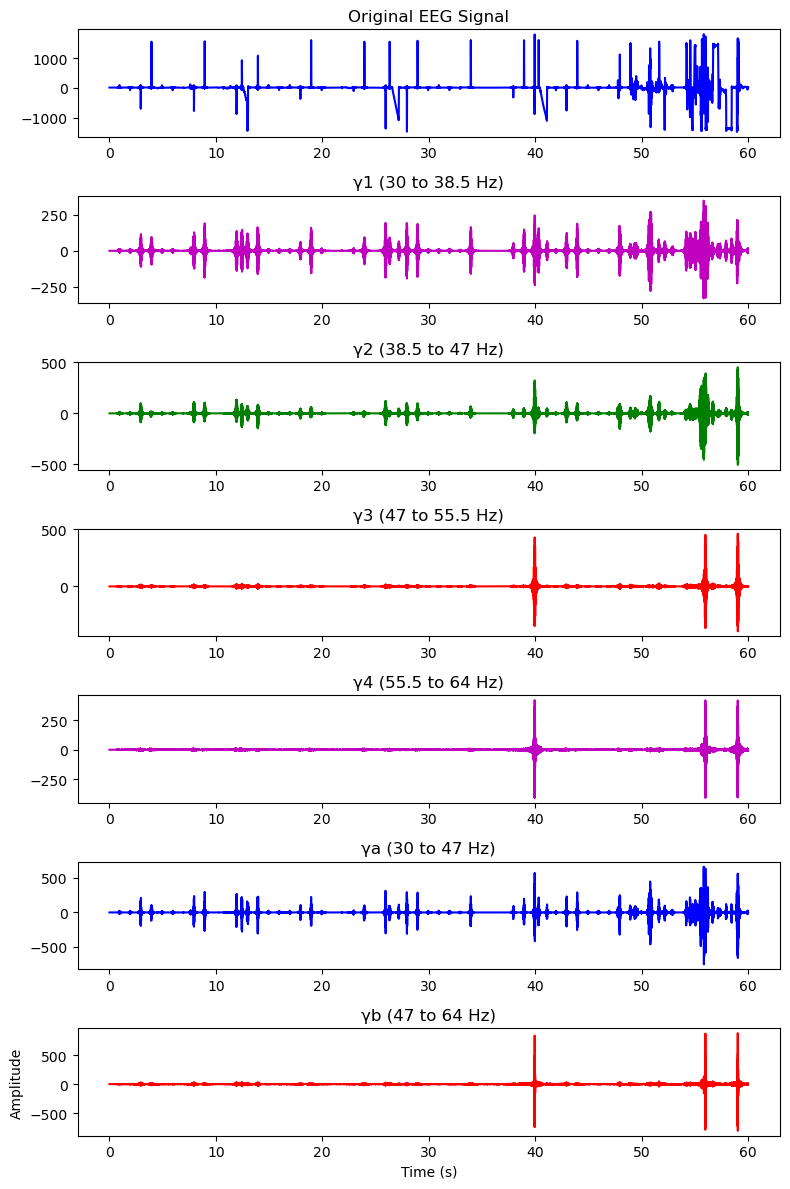

In [16]:
# Define the EEG signal
eeg_signal = w_112  # Replace with your actual EEG signal

# Define the frequency bands
gamma_1 = (30,38.5)
gamma_2 = (38.6,47)
gamma_3 = (47,55.5)
gamma_4 = (55.5,63.5)
gamma_a = (30,47)
gamma_b = (47,63.5)


# Apply bandpass filters to the EEG signal
fs = 128  # Replace with the actual sampling rate of your EEG signal
gamma_1_filtered = bandpass_filter(eeg_signal, gamma_1[0], gamma_1[1], fs)
gamma_2_filtered = bandpass_filter(eeg_signal, gamma_2[0], gamma_2[1], fs)
gamma_3_filtered = bandpass_filter(eeg_signal, gamma_3[0], gamma_3[1], fs)
gamma_4_filtered = bandpass_filter(eeg_signal, gamma_4[0], gamma_4[1], fs)
gamma_a_filtered = bandpass_filter(eeg_signal, gamma_a[0], gamma_a[1], fs)
gamma_b_filtered = bandpass_filter(eeg_signal, gamma_b[0], gamma_b[1], fs)

# Plot the original and filtered signals
time = np.arange(len(eeg_signal)) / fs

# Create a figure and subplots
fig, axs = plt.subplots(7, 1, figsize=(8, 12))


#plt.figure(figsize=(12, 8))

# Original EEG signal
axs[0].plot(time, eeg_signal, 'b')
axs[0].set_title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma 1 band filtered signal
axs[1].plot(time, gamma_1_filtered, 'm')
axs[1].set_title('γ1 (30 to 38.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma 2 band filtered signal
axs[2].plot(time, gamma_2_filtered, 'g')
axs[2].set_title('γ2 (38.5 to 47 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma 3 band filtered signal
axs[3].plot(time, gamma_3_filtered, 'r')
axs[3].set_title('γ3 (47 to 55.5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma 4 band filtered signal
axs[4].plot(time, gamma_4_filtered, 'm')
axs[4].set_title('γ4 (55.5 to 64 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma a band filtered signal
axs[5].plot(time, gamma_a_filtered, 'b')
axs[5].set_title('γa (30 to 47 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Gamma b band filtered signal
axs[6].plot(time, gamma_b_filtered, 'r')
axs[6].set_title('γb (47 to 64 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()


### Variational Mode Decomposotion

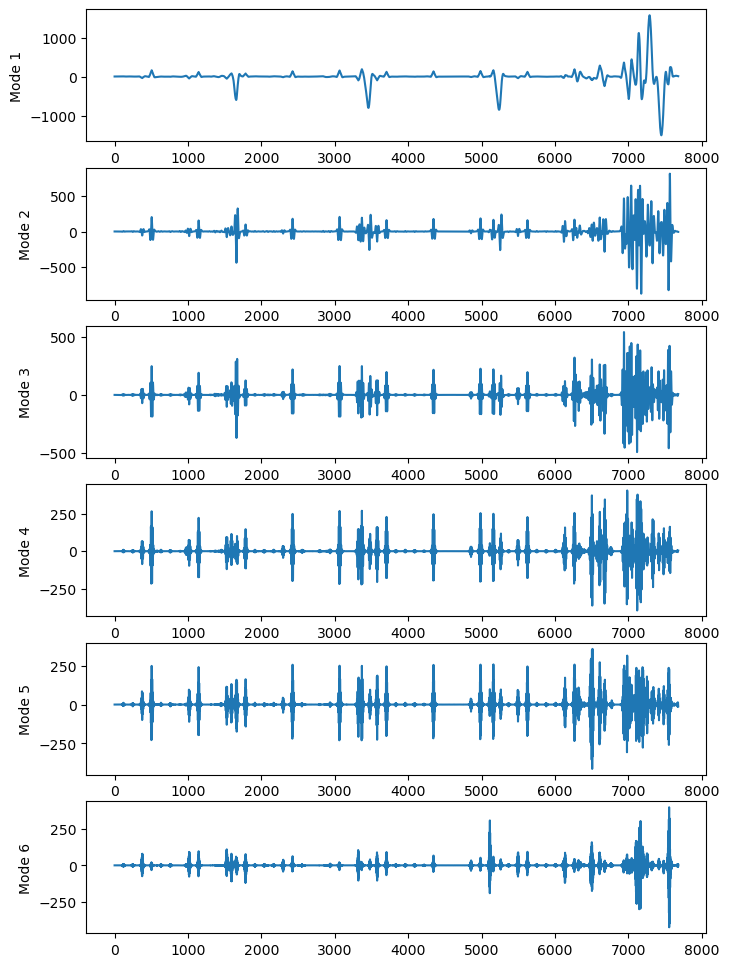

In [20]:
import numpy as np
from vmdpy import VMD

# Generate a sample signal
t = np.linspace(0, 1, 1000)
f1 = 10
f2 = 100

signal = w_112

# Set VMD parameters
alpha = 2000
tau = 0
K = 6
DC = 0
init = 1           # initialize omegas uniformly  
tol = 1e-7 

# Run VMD on the signal
modes, spectrum, omega =VMD (signal, alpha, tau, K, DC, init,tol)

#Plot the decomposed modes
import matplotlib.pyplot as plt
fig, axs = plt.subplots(K, 1, figsize=(8, 12))
for i in range(K):
    axs[i].plot(modes[i, :])
    axs[i].set_ylabel(f"Mode {i+1}")
plt.show()


In [22]:
           
mode_table= pd.DataFrame(modes.T, columns=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 4', 'Mode 5', 'Mode 6'])
mode_table

,Mode 1,Mode 2,Mode 3,Mode 4,Mode 5,Mode 6
0,10.445616,0.430509,0.111103,0.033367,0.015333,0.005193
1,10.445068,0.429921,0.110434,0.032551,0.014289,0.000238
2,10.445605,0.430528,0.111091,0.033371,0.015343,0.005190
3,10.445050,0.429953,0.110415,0.032560,0.014293,0.000240
4,10.445581,0.430571,0.111065,0.033385,0.015334,0.005188
...,...,...,...,...,...,...
7675,18.474210,-5.204092,-1.460780,-1.847614,10.614589,-8.953250
7676,18.134348,-5.578307,1.191011,-0.150893,13.286752,1.441975
7677,18.027102,-5.673329,3.869371,1.573845,6.917027,6.103071
7678,18.080823,-5.571245,6.123615,3.143646,-3.655023,-8.257860


In [26]:

num_sets = 60
set_size = 128
value_range = 7680

# Generate random numbers for each set
sets = np.random.randint(0, value_range, size=(num_sets, set_size))

st=modes[1]
sti=st[sets]
sti

# Calculate the mean of each set
means = np.mean(sti, axis=1)
stds=np.std(sti,axis=1)
varsi=np.var(sti,axis=1)

means
stds
varsi


rt=[means, stds, varsi]
rt_re=np.reshape(rt, [60,3])
import pandas as pd
df=pd.DataFrame(rt_re, columns=['Mean', "Standard", 'Variance'])
df["Bis"] = bw_112
df.head()

print('The shape is', df.shape)
df.head()

The shape is (60, 4)


,Mean,Standard,Variance,Bis
0,4.458130,3.565749,10.613726,0.0
1,2.509634,-3.900860,8.044438,0.0
2,17.661510,-2.845319,-10.273485,0.0
3,-1.994256,-11.706196,13.483037,0.0
4,-10.671657,-1.521967,7.314956,0.0


In [28]:
import numpy as np

num_sets = 60
set_size = 128
value_range = 7680

# Generate random numbers for each set
sets = np.random.randint(0, value_range, size=(num_sets, set_size))

st=w_112
sti=st[sets]
sti

# Calculate the mean of each set
means = np.mean(sti, axis=1)
stds=np.std(sti,axis=1)
varsi=np.var(sti,axis=1)



rt=[means, stds, varsi]
rt_re=np.reshape(rt, [60,3])
import pandas as pd
df=pd.DataFrame(rt_re, columns=['Mean', "Standard deviation", 'Variance'])
df["Bis"] = bw_112

print('The shape is', df.shape)
df.head()


The shape is (60, 4)


,Mean,Standard deviation,Variance,Bis
0,21.176953,-5.773047,-21.276562,0.0
1,4.130078,-12.155469,-1.238281,0.0
2,-20.451563,-27.542188,4.150000,0.0
3,37.416797,-0.142188,-46.388281,0.0
4,18.650000,-14.315234,-5.860156,0.0
